In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)

100%|██████████| 2.70G/2.70G [00:20<00:00, 138MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2


In [ ]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

In [ ]:
train = './new_plant_disease/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'

In [4]:
size = 224
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.0,
    height_shift_range=0.0,
    shear_range=0.0,
    zoom_range=0.0,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255,
    preprocessing_function=None,
    validation_split=0.1
).flow_from_directory(
    train,
    target_size=(size, size),
    batch_size=64,
    class_mode='categorical',
    color_mode='rgb',
    subset='training',
    shuffle=True
)


Found 63282 images belonging to 38 classes.


In [5]:
train_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [ ]:
valid = './new_plant_disease/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [8]:
valid_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function = None,
    validation_split=0.1
).flow_from_directory(valid,
                      batch_size=164,
                      target_size=(size, size),
                      class_mode='categorical',
                      color_mode='rgb',
                      subset='validation',
                      shuffle=False)

Found 1742 images belonging to 38 classes.


In [ ]:
test = './new_plant_disease/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function = None
).flow_from_directory(test,
                      batch_size=164,
                      target_size=(224, 224),
                      color_mode='rgb',
                      class_mode = 'categorical',
                      shuffle = False)

Found 17572 images belonging to 38 classes.


In [10]:
test_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [11]:
from tensorflow import keras
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(filters=32, kernel_size=7, strides=1, padding='same',
                              activation='relu', name="Conv1", input_shape=(224, 224, 3)))
model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool1"))

model.add(keras.layers.Conv2D(filters=64, kernel_size=5, strides=1, padding='same',
                              activation='relu', name='Conv2'))
model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool2"))

model.add(keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding='same',
                              activation='relu', name='Conv3'))
model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool3"))

model.add(keras.layers.Conv2D(filters=256, kernel_size=3, strides=1, padding='same',
                              activation='relu', name='Conv4'))

model.add(keras.layers.Flatten(name='Flatten1'))

model.add(keras.layers.Dense(128, activation='relu', name='Dense1'))
tf.keras.layers.Dropout(0.5)

model.add(keras.layers.Dense(64, activation='relu', name='Dense2'))
tf.keras.layers.Dropout(0.5)

model.add(keras.layers.Dense(38, activation='softmax', name='Output'))

print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                       │ (None, 224, 224, 32)        │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool1 (MaxPooling2D)                 │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2 (Conv2D)                       │ (None, 112, 112, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool2 (MaxPooling2D)                 │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv3 (Conv2D)                       │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool3 (MaxPooling2D)                 │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv4 (Conv2D)                       │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten1 (Flatten)                   │ (None, 200704)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense1 (Dense)                       │ (None, 128)                 │      25,690,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense2 (Dense)                       │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 38)                  │           2,470 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,125,990 (99.66 MB)

 Trainable params: 26,125,990 (99.66 MB)

 Non-trainable params: 0 (0.00 B)

None


In [12]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras',  monitor='val_loss', save_best_only=True)
model_ReduceLRonPlateau = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=15, min_lr=0.000001)
callbacks = [early_stopping, model_checkpoint, model_ReduceLRonPlateau]

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'precision', 'recall'])

In [14]:
history = model.fit(train_generator, epochs=5, validation_data=valid_generator, callbacks=callbacks)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
989/989 ━━━━━━━━━━━━━━━━━━━━ 805s 796ms/step - accuracy: 0.2485 - loss: 2.7125 - precision: 0.7049 - recall: 0.1163 - val_accuracy: 0.5964 - val_loss: 1.2689 - val_precision: 0.7271 - val_recall: 0.5109 - learning_rate: 0.0010
Epoch 2/5
989/989 ━━━━━━━━━━━━━━━━━━━━ 763s 771ms/step - accuracy: 0.7288 - loss: 0.8645 - precision: 0.8287 - recall: 0.6404 - val_accuracy: 0.7985 - val_loss: 0.6178 - val_precision: 0.8549 - val_recall: 0.7509 - learning_rate: 0.0010
Epoch 3/5
989/989 ━━━━━━━━━━━━━━━━━━━━ 741s 750ms/step - accuracy: 0.8493 - loss: 0.4605 - precision: 0.8908 - recall: 0.8156 - val_accuracy: 0.8743 - val_loss: 0.4053 - val_precision: 0.9030 - val_recall: 0.8548 - learning_rate: 0.0010
Epoch 4/5
989/989 ━━━━━━━━━━━━━━━━━━━━ 739s 746ms/step - accuracy: 0.8935 - loss: 0.3253 - precision: 0.9173 - recall: 0.8729 - val_accuracy: 0.8967 - val_loss: 0.3354 - val_precision: 0.9126 - val_recall: 0.8806 - learning_rate: 0.0010
Epoch 5/5
989/989 ━━━━━━━━━━━━━━━━━━━━ 744s 748ms/st

In [18]:
model_evaluate = model.evaluate(test_generator)
print("loss:", model_evaluate[0])
print("accuracy:", model_evaluate[1])
print("precision:", model_evaluate[2])
print("recall:", model_evaluate[3])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


108/108 ━━━━━━━━━━━━━━━━━━━━ 38s 351ms/step - accuracy: 0.9089 - loss: 0.2853 - precision: 0.9195 - recall: 0.9032
loss: 0.2627263367176056
accuracy: 0.9152060151100159
precision: 0.9264227747917175
recall: 0.9078648090362549


In [ ]:
# save the model
model.save('./plant_disease_cnn_model.keras')

In [1]:
def model_predict(image_path):
    model = tf.keras.models.load_model('./plant_disease_cnn_model.keras')
    img = cv2.imread(image_path)
    H, W, C = 224, 224, 3
    img = cv2.resize(img, (H, W))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.array(img)
    img = img.astype('float32')
    img = img / 255.0
    img = img.reshape(1, H, W, C)

    prediction = np.argmax(model.predict(img), axis=-1)[0]

    return prediction

In [8]:
result_index = model_predict('./test/AppleScab1.JPG')
print(result_index)

class_name = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy',
            'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 
            'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 
            'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 
            'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 
            'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot',
            'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 
            'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 
            'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 
            'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 
            'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 
            'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 
            'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus',
                'Tomato___healthy']

print("Model is predicting that it is a {}".format(': '.join(class_name[result_index].split('___'))))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
16
Model is predicting that it is a Peach: Bacterial_spot


Model loaded successfully.
Loading validation data...
Found 7013 images belonging to 38 classes.
Generating predictions...
110/110 ━━━━━━━━━━━━━━━━━━━━ 59s 537ms/step


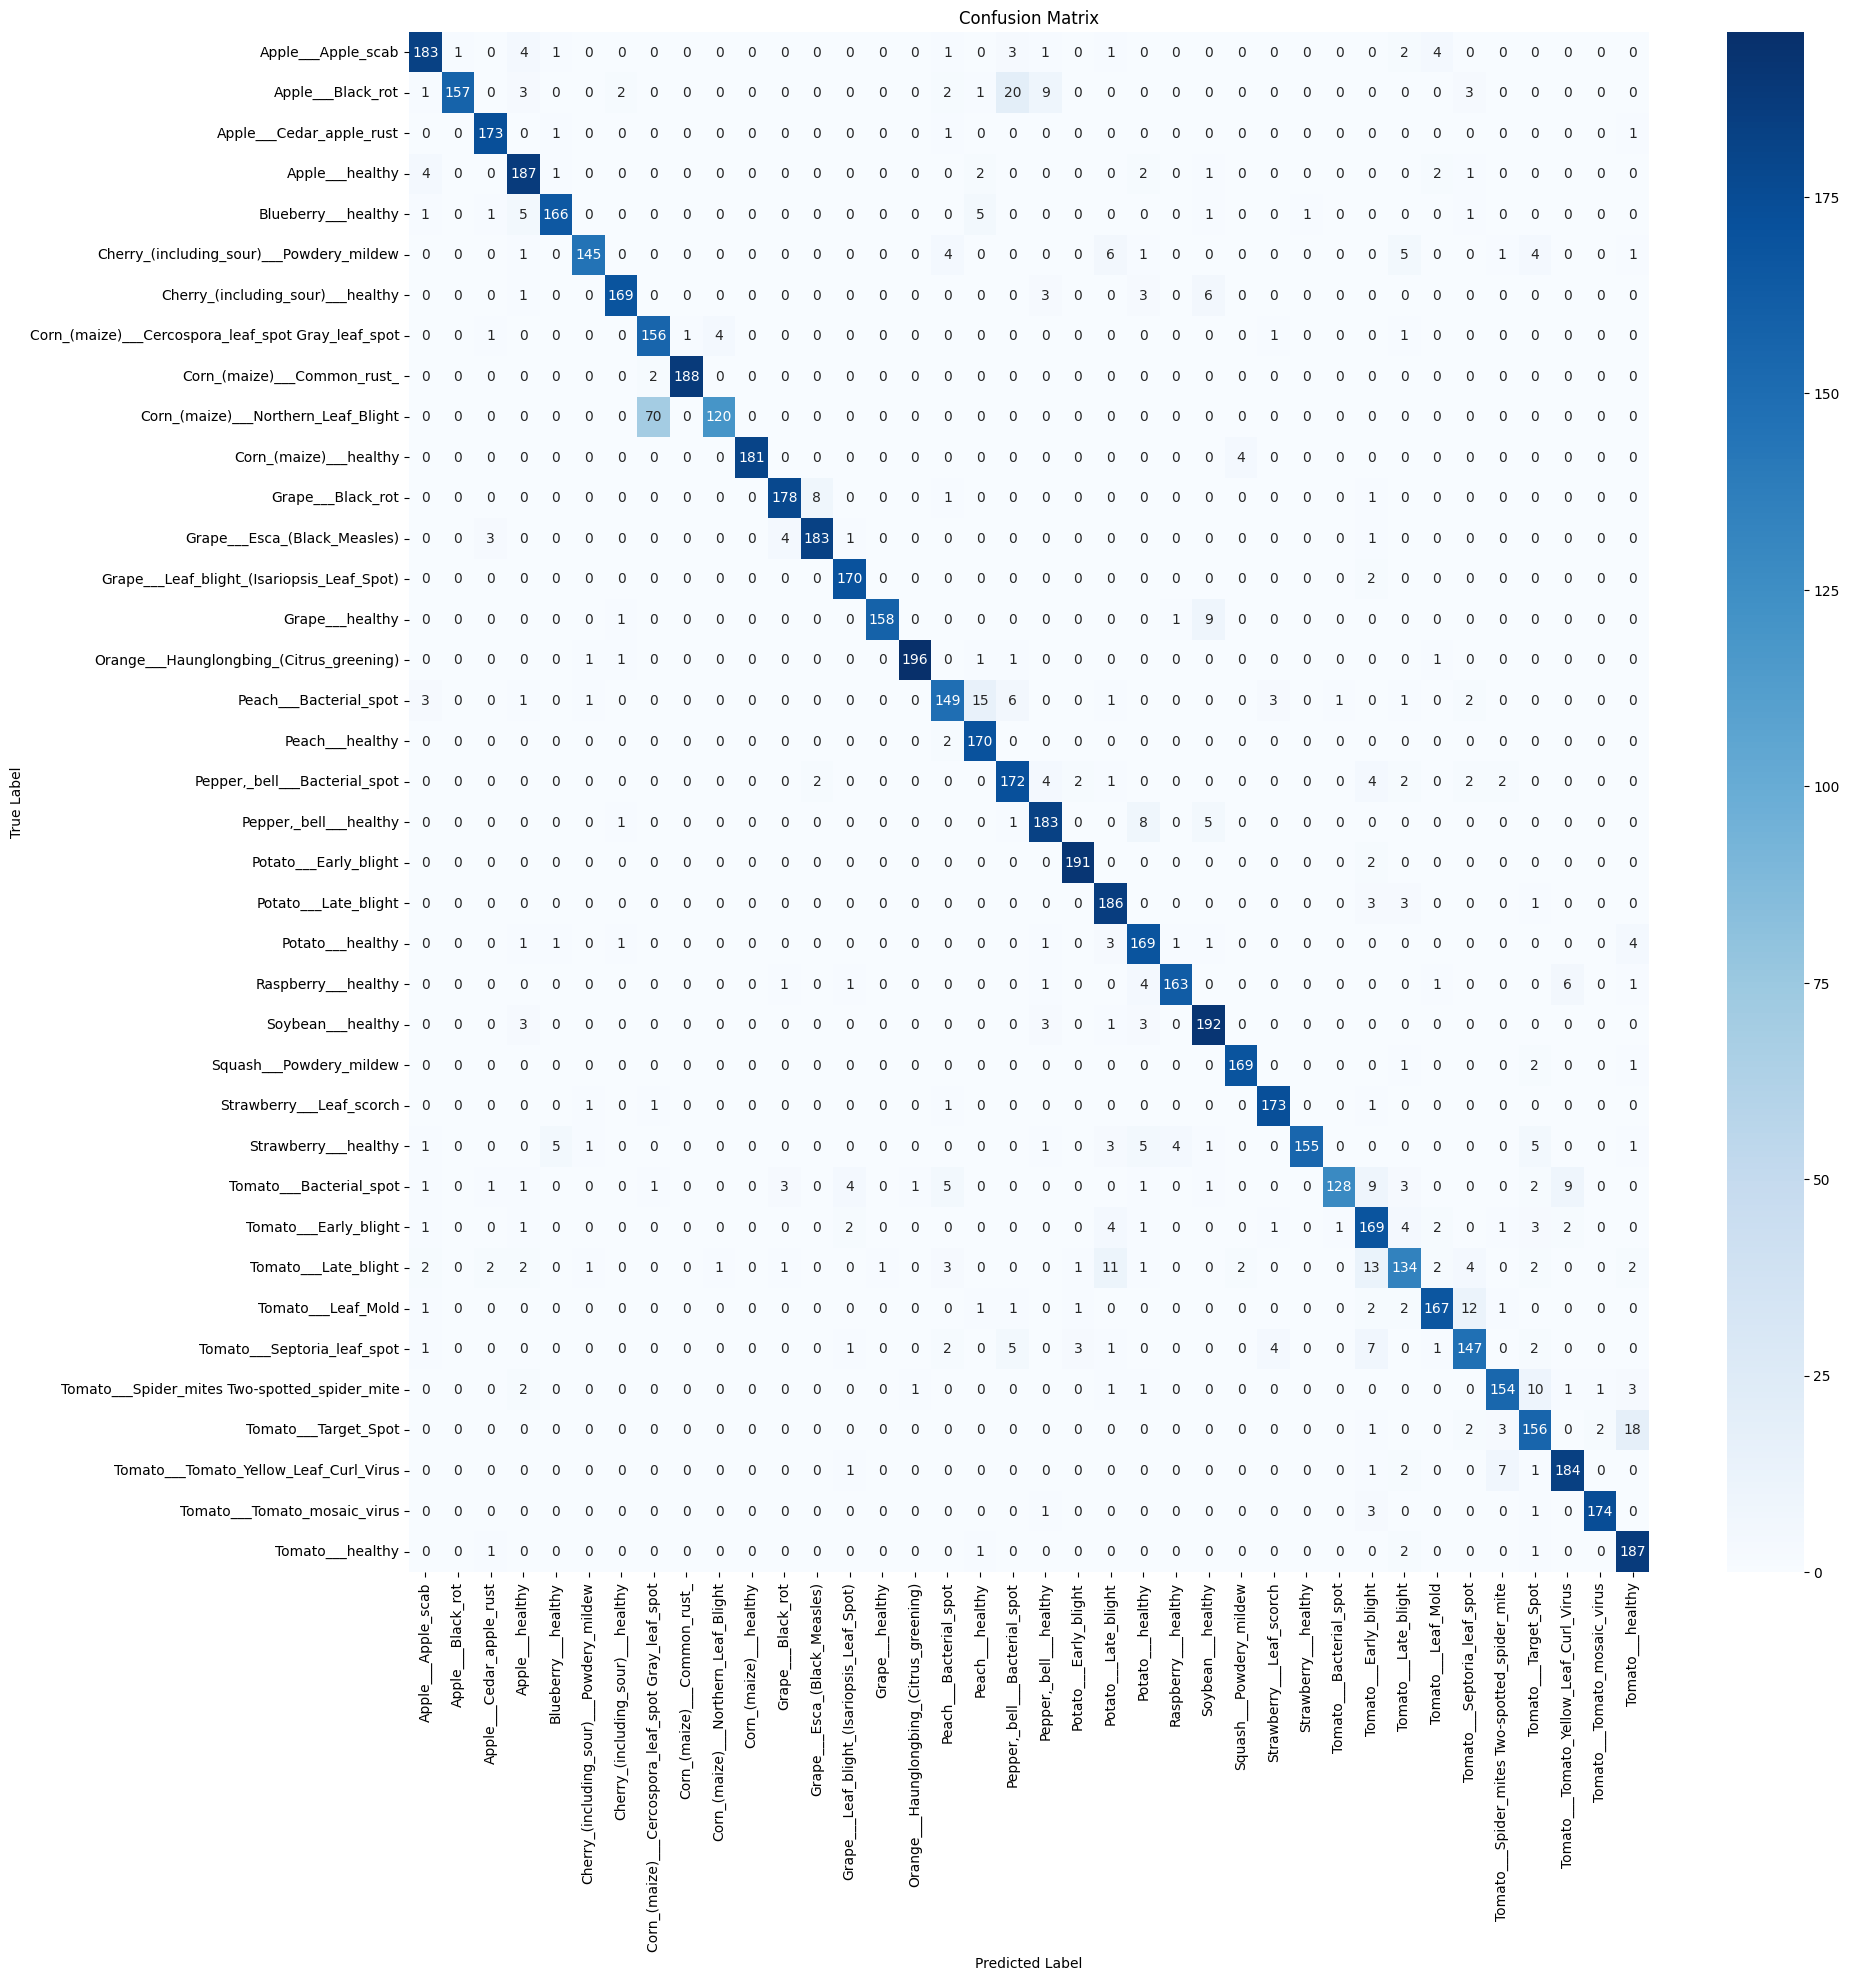

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.92      0.91      0.92       201
                                 Apple___Black_rot       0.99      0.79      0.88       198
                          Apple___Cedar_apple_rust       0.95      0.98      0.97       176
                                   Apple___healthy       0.88      0.94      0.91       200
                               Blueberry___healthy       0.95      0.92      0.93       181
          Cherry_(including_sour)___Powdery_mildew       0.97      0.86      0.91       168
                 Cherry_(including_sour)___healthy       0.97      0.93      0.95       182
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.68      0.95      0.79       164
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       190
               Corn_(maize)___Northern_Leaf_Blight       0.96      0.63      0.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow as tf

train = './new_plant_disease/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
size = 224

# 1. Load your saved model
# Make sure 'model.keras' is in the same directory, or provide the full path
try:
    model = tf.keras.models.load_model('./plant_disease_cnn_model.keras')
    print("Model loaded successfully.")
except:
    print("Model object not found or file not found. Using existing 'model' from memory if available.")

# 2. Re-create the Validation Generator with shuffle=False
# We assume 'train' and 'size' variables are still defined from your previous cells.
# If not, redefine 'train' to your dataset path and 'size' to 224.
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

print("Loading validation data...")
validation_generator = validation_datagen.flow_from_directory(
    train,                    # Path to your training dataset
    target_size=(size, size), # Ensure this matches your training input size (e.g., 224)
    batch_size=64,
    class_mode='categorical',
    color_mode='rgb',
    subset='validation',      # Select the validation subset
    shuffle=False             # CRITICAL: Must be False to line up predictions with labels
)

# 3. Make Predictions
print("Generating predictions...")
# This will take a moment depending on your dataset size
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1) # Convert probabilities to class index

# 4. Get True Labels
y_true = validation_generator.classes

# 5. Compute and Plot Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
class_names = list(validation_generator.class_indices.keys())

plt.figure(figsize=(20, 20)) # Adjusted size for 38 classes
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names,
            yticklabels=class_names)

plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=90) # Rotate x labels for better readability
plt.yticks(rotation=0)
plt.show()

# Optional: Print Classification Report for Precision/Recall/F1-Score
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=class_names))

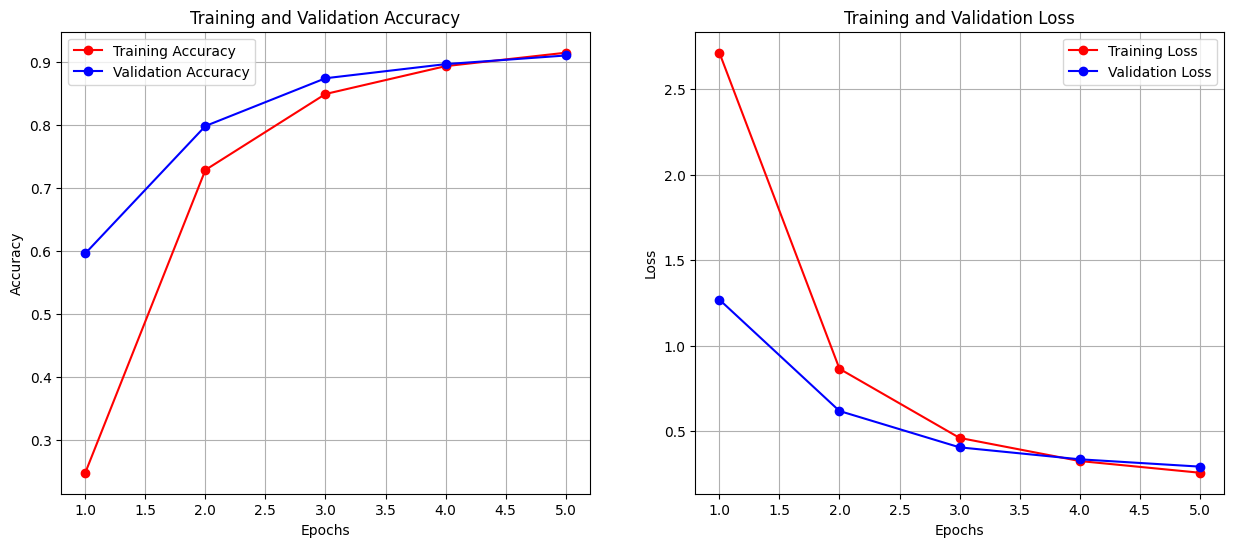

In [15]:
import matplotlib.pyplot as plt

# 1. Data manually extracted from your logs
epochs = [1, 2, 3, 4, 5]

# Training and Validation Loss
train_loss = [2.7125, 0.8645, 0.4605, 0.3253, 0.2569]
val_loss   = [1.2689, 0.6178, 0.4053, 0.3354, 0.2926]

# Training and Validation Accuracy (Optional but good to have)
train_acc = [0.2485, 0.7288, 0.8493, 0.8935, 0.9148]
val_acc   = [0.5964, 0.7985, 0.8743, 0.8967, 0.9104]

# 2. Create the Plots
plt.figure(figsize=(15, 6))

# --- Plot 1: Loss ---
plt.subplot(1, 2, 2) # 1 row, 2 columns, 1st plot
plt.plot(epochs, train_loss, 'r-o', label='Training Loss')
plt.plot(epochs, val_loss, 'b-o', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# --- Plot 2: Accuracy ---
plt.subplot(1, 2, 1) # 1 row, 2 columns, 2nd plot
plt.plot(epochs, train_acc, 'r-o', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b-o', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.show()